In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from datetime import datetime
import statsmodels.api as sm

In [2]:
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

In [3]:
series = series.loc[:35]

In [4]:
series.dtypes

Month                                         object
Sales of shampoo over a three year period    float64
dtype: object

In [5]:
series['Month'] = series['Month'].apply(lambda x: datetime.strptime('190'+x, '%Y-%m'))

In [6]:
series

,Month,Sales of shampoo over a three year period
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3
5,1901-06-01,168.5
6,1901-07-01,231.8
7,1901-08-01,224.5
8,1901-09-01,192.8
9,1901-10-01,122.9


In [7]:
series.set_index('Month',inplace=True)

In [8]:
series.head()

,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


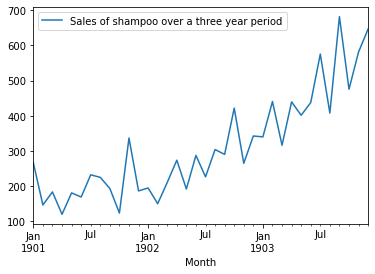

In [9]:
series.plot()

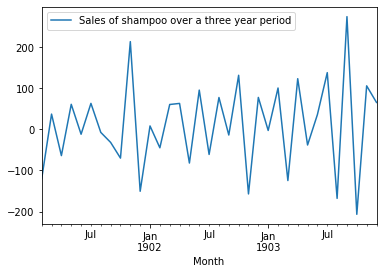

In [10]:
new_series = series.copy()
new_series['Sales of shampoo over a three year period'] = series['Sales of shampoo over a three year period'] - series['Sales of shampoo over a three year period'].shift(1)
new_series.dropna().plot()

In [11]:
avg_series=series.rolling(window=12).mean()

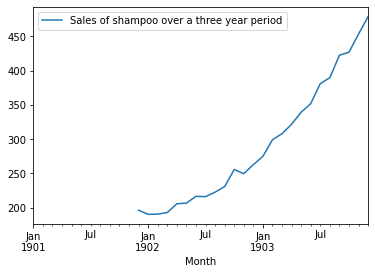

In [12]:
avg_series.plot()

In [13]:
sm.stats.durbin_watson((series['Sales of shampoo over a three year period']-series['Sales of shampoo over a three year period'].shift(1)).dropna())

3.3569486471992795

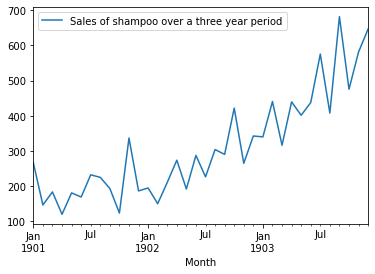

In [14]:
series.plot()

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller((new_series).dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.249074
p-value: 0.000000


In [16]:
new_series=new_series.dropna()

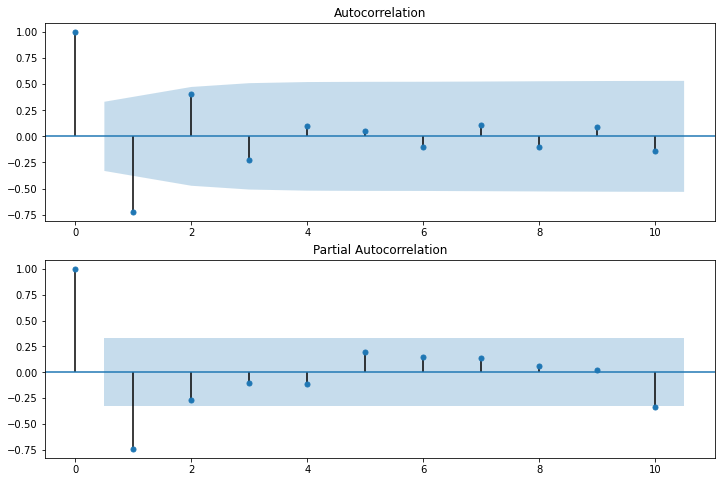

In [17]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(new_series.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(new_series, lags=10, ax=ax2)

In [38]:
training_data = new_series.iloc[:28]
test_data = new_series.iloc[28:]

In [39]:
arima= ARIMA(training_data,order=(2,0,2))

C:\Users\Anant\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [40]:
model=arima.fit()

In [41]:
model.aic

320.2734484966386

In [42]:
pred = model.forecast(steps=7)[0]

In [43]:
np.sqrt(mean_squared_error(test_data,pred))

184.42774687095215